# EDA

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/날씨 콘테스트/2012_2016_.csv')
df_hospital = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/날씨 콘테스트/back_hospital.csv')

# dff = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/날씨 콘테스트/2012_2016_.csv')
df_hospital_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/날씨 콘테스트/2-2_검증데이터셋.csv', encoding='CP949')

In [ ]:
# 쓸모 없는 column 삭제
# df.drop(columns='Unnamed: 0', inplace=True) 


In [ ]:
# 2015, 2016 분리
index_2015 = df[df['YMD'] == '2015-01-01'].index[0] 
index_2016 = df[df['YMD'] == '2016-01-01'].index[0]

df_train = df.iloc[:index_2015, : ] # 2012-2014
df_val = df.iloc[index_2015:index_2016, : ] # 2015
df_test = df.iloc[index_2016:, : ] # 2016

In [ ]:
# YMD 형식으로 변경 - 한 번만 돌릴 것!! - hospital 용
def change_str(col):
  col = str(col)
  return col[:4] + '-' + col[4:6] + '-' + col[6:]

# column name 변경
def change_col(df):
  df.rename(columns={'back_hospital.yyyymmdd':'YMD', 'back_hospital.area':'area'}, inplace=True)
  df['YMD'] = df['YMD'].apply(change_str)
  df['YMD'].astype(str) # df도 해주기
  return df
  
def change_col_test(df):
  df.rename(columns={'yyyymmdd':'YMD', 'back_hospital.area':'area'}, inplace=True)
  df['YMD'] = df['YMD'].apply(change_str)
  df['YMD'].astype(str) # df도 해주기
  return df

In [ ]:
df_hospital = change_col(df_hospital)
df_hospital_test = change_col_test(df_hospital_test)

In [ ]:
df_hospital

,Unnamed: 0,YMD,area,back_hospital.sex,back_hospital.frequency
0,1,2012-01-01,강원,1,3
1,2,2012-01-01,강원,2,3
2,3,2012-01-01,경기,1,4
3,4,2012-01-01,경기,2,5
4,5,2012-01-01,경남,1,2
...,...,...,...,...,...
49669,49670,2015-12-31,제주,2,0
49670,49671,2015-12-31,충남,1,0
49671,49672,2015-12-31,충남,2,0
49672,49673,2015-12-31,충북,1,1


In [ ]:
# hospital set 2012-2014, 2015 분리
index_2015 = df_hospital[df_hospital['YMD'] == '2015-01-01'].index[0] 

df_hospital_train = df_hospital.iloc[:index_2015, : ] # 2012-2014
df_hospital_val = df_hospital.iloc[index_2015:, : ] # 2015


In [ ]:
print(df_train.shape, df_val.shape, df_test.shape) # 예보 데이터
print(df_hospital_train.shape, df_hospital_val.shape, df_hospital_test.shape) # frequency


(18632, 14) (6205, 14) (6222, 14)
(37264, 5) (12410, 5) (12444, 4)


In [ ]:
df_hospital_val.head()
# print(len(df_hospital_val))

,Unnamed: 0,YMD,area,back_hospital.sex,back_hospital.frequency
37264,37265,2015-01-01,강원,1,4
37265,37266,2015-01-01,강원,2,2
37266,37267,2015-01-01,경기,1,4
37267,37268,2015-01-01,경기,2,6
37268,37269,2015-01-01,경남,1,6


In [ ]:
# train, val 데이터셋 맞춰주기
def copy_row(mydf):

  mydf = mydf.append(mydf, ignore_index=True)
  mydf.sort_values(by=['YMD', 'area'], inplace=True)
  mydf.reset_index(inplace=True)
  
  return mydf


In [ ]:
df_train = copy_row(df_train)
df_val = copy_row(df_val)

In [ ]:
print(df_train.shape, df_val.shape, df_test.shape) # 예보 데이터
print(df_hospital_train.shape, df_hospital_val.shape, df_hospital_test.shape) # frequency


(37264, 15) (12410, 15) (6222, 14)
(37264, 5) (12410, 5) (12444, 4)


In [ ]:
# test 데이터 맞춰주기
df_test_real = pd.DataFrame()
for i in range(int(len(df_test) / 17)):
  i *= 17
  df_test_real = df_test_real.append(df_test.iloc[i:i+17, :], ignore_index=True) # inplace 없으니 따로 지정해줄 것
  df_test_real = df_test_real.append(df_test.iloc[i:i+17, :], ignore_index=True)

df_test = df_test_real # 원상 복귀

In [ ]:
print(df_train.shape, df_val.shape, df_test.shape) # 예보 데이터
print(df_hospital_train.shape, df_hospital_val.shape, df_hospital_test.shape) # frequency


(37264, 15) (12410, 15) (12444, 14)
(37264, 5) (12410, 5) (12444, 4)


In [ ]:
# concat 위한 index 초기화
df_hospital_val.reset_index(drop=True, inplace=True)


In [ ]:
# df 합치기 
def combine(df_hospital, df):

  df = pd.concat([df_hospital, df], axis=1, join='outer', ) 
  return df

In [ ]:
df_train = combine(df_hospital_train, df_train)
df_val = combine(df_hospital_val, df_val) # 이것만 이상하게 나온 이유가 index 0부터 시작 아니네..
df_test = combine(df_hospital_test, df_test)

In [ ]:
# 쓸모 없는 column 제거
df_train = pd.concat([df_train.iloc[:, 3:5], df_train.iloc[:, 7:]], axis=1, join='outer') # 새로운 방법 찾아보는 건 좋은데, 시간 오래 걸려도 비효율이다. 선택 잘하자ㄹ
df_val = pd.concat([df_val.iloc[:, 3:5], df_val.iloc[:, 7:]], axis=1, join='outer')
df_test = pd.concat([df_test.iloc[:, 2:4], df_test.iloc[:, 5:]], axis=1, join='outer')



In [ ]:
# 결측치 비율 확인
def null_per(df):
  
  return df.isnull().sum() / len(df) * 100 

In [ ]:
print(null_per(df_train), '\n') # 6시간 강수량, 적설량, 풍속 결측치 많은데 imputer 쓸 예정
print(null_per(df_val), '\n')
print(null_per(df_test))

back_hospital.sex           0.000000
back_hospital.frequency     0.000000
YMD                         0.000000
area                        0.000000
3시간기온                       5.565693
6시간강수량                     26.835552
6시간신적설                     26.835552
강수형태                        5.565693
강수확률                        5.565693
습도                          5.565693
일최고기온                       5.565693
일최저기온                       5.565693
풍속                         53.515457
풍향                          8.989910
하늘상태                       19.525547
dtype: float64 

back_hospital.sex          0.000000
back_hospital.frequency    0.000000
YMD                        0.000000
area                       0.000000
3시간기온                      2.739726
6시간강수량                     2.739726
6시간신적설                     2.739726
강수형태                       2.739726
강수확률                       2.739726
습도                         2.739726
일최고기온                      2.739726
일최저기온                      2.739

In [ ]:
# 결측 비율 공통된거 삭제 - only train, val 
def clear_null(df):
  filter= df['3시간기온'].dropna(axis=0).index
  df = df.iloc[filter, :]
  return df

In [ ]:
df_train = clear_null(df_train)
df_val = clear_null(df_val)

In [ ]:
## 하늘상태 column drop할지 사용할 지 결정

# sns.displot(df_train['하늘상태'])
# np.percentile(df_train['하늘상태'], 99)
# df_train['하늘상태'].describe()

In [ ]:
# df['YMD'] = pd.to_datetime(df['YMD'], format='%Y-%m-%d') # 오류남 - dtype('<M8[ns]') 랑 머신러닝이랑 안 맞나,,
# df['YMD'] = df['YMD'].values.astype('datetime64[D]') # 이것도 안됨

from datetime import datetime, date, time
## 일단 YMD로 feature 진행

df_train['YMD'] = pd.to_datetime(df_train['YMD'], format='%Y-%m-%d')
df_val['YMD'] = pd.to_datetime(df_val['YMD'], format='%Y-%m-%d')
df_test['YMD'] = pd.to_datetime(df_test['YMD'], format='%Y-%m-%d')

df_train['month'] = df_train['YMD'].dt.month 
df_val['month'] = df_val['YMD'].dt.month 
df_test['month'] = df_test['YMD'].dt.month 

# df_train['year'] = df_train['YMD'].dt.year # year은 중요한 피쳐가 아닌듯..


In [ ]:
def set_season(month):
  if 3 <= month <= 5 :
    return 'spring'
  elif 6 <= month <= 8 :
    return 'summer'  
  elif 9 <= month <= 11 :
    return 'fall'  
  elif  (month <= 2) or (month == 12) :
    return 'winter'   

df_train['season'] = df_train['month'].apply(set_season)
df_val['season'] = df_val['month'].apply(set_season)
df_test['season'] = df_test['month'].apply(set_season)


In [ ]:
def what_day(date):
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] 
    day = date.weekday() # 들어온 date(YYYY_MM_DD).weekday() -> 0-6까지 매핑된 결과로 출력 
    return days[day] # days : 월-일 있는 리스트

df_train['day'] = df_train['YMD'].dt.date.apply(what_day) 
df_val['day'] = df_val['YMD'].dt.date.apply(what_day) 
df_test['day'] = df_test['YMD'].dt.date.apply(what_day) 


In [ ]:
def is_it_weekend(day):
  if day in ['Sat', 'Sun']:
    return 'Weekend'
  else : 
    return 'Weekdays'

df_train['is_it_weekend'] = df_train['day'].apply(is_it_weekend)
df_val['is_it_weekend'] = df_val['day'].apply(is_it_weekend)
df_test['is_it_weekend'] = df_test['day'].apply(is_it_weekend) # 이것조차도 반복문 쓸까

In [ ]:
def is_it_day1(day):
  if day == 1:
    return 'Yes'
  else : 
    return 'No'

df_train['is_it_day1'] = df_train['YMD'].dt.day.apply(is_it_day1) 
df_val['is_it_day1'] = df_val['YMD'].dt.day.apply(is_it_day1) 
df_test['is_it_day1'] = df_test['YMD'].dt.day.apply(is_it_day1)

In [ ]:
df_train.rename(columns={'back_hospital.sex':'sex', 'back_hospital.frequency':'frequency'}, inplace=True)
df_val.rename(columns={'back_hospital.sex':'sex', 'back_hospital.frequency':'frequency'}, inplace=True)


> sex type str인지 확인!!


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
"""
target_col = df_train['frequency']
len(target_col)
np.percentile(df_train['frequency'], 95) # target 이상치 5프로(value 5-13) / val도 마찬가지
"""

"\ntarget_col = df_train['frequency']\nlen(target_col)\nnp.percentile(df_train['frequency'], 95) # target 이상치 5프로(value 5-13) / val도 마찬가지\n"

In [ ]:
# 타겟 이상치(outlier)를 제거
# df_train = df_train[df_train['frequency'] < 7]


In [ ]:
"""
target = df_train['frequency']

plots=pd.DataFrame()
plots['original']=target
plots['transformed']=np.log1p(target)
plots['backToOriginal']=np.expm1(np.log1p(target))

fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(plots['original'], ax=ax[0]);
sns.histplot(plots['transformed'], ax=ax[1]);
sns.histplot(plots['backToOriginal'], ax=ax[2]);
"""

"\ntarget = df_train['frequency']\n\nplots=pd.DataFrame()\nplots['original']=target\nplots['transformed']=np.log1p(target)\nplots['backToOriginal']=np.expm1(np.log1p(target))\n\nfig, ax = plt.subplots(1,3,figsize=(15,5))\nsns.histplot(plots['original'], ax=ax[0]);\nsns.histplot(plots['transformed'], ax=ax[1]);\nsns.histplot(plots['backToOriginal'], ax=ax[2]);\n"

# 데이터셋 target 분류하기 전! 



In [ ]:
# split 전 전체 데이터 export

# my_df = pd.concat([df_train, df_val, df_test])
# my_df.to_csv('/content/drive/MyDrive/Colab Notebooks/날씨 콘테스트/all_df.csv' )

In [ ]:
df_list = [df_train, df_val, df_test]

for i in df_list:
  i.drop(columns=['YMD', '6시간강수량', '6시간신적설', '풍속', '하늘상태'], inplace=True)

  # df.drop(columns=['6시간강수량', '6시간신적설', '풍속', '하늘상태'])


In [ ]:
# val set split
from sklearn.model_selection import train_test_split

target = 'frequency'
features = df_train.columns.drop(target) # 이미 array type

X_train, y_train = df_train.loc[:, features], df_train.loc[:, target]
X_val, y_val = df_val.loc[:, features], df_val.loc[:, target]
X_test, y_test = df_test.loc[:, features], df_test.loc[:, target]

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(35190, 14) (12070, 14) (12444, 14) (35190,) (12070,) (12444,)


In [ ]:
# csv 출력
# df.to_csv('/content/drive/MyDrive/Colab Notebooks/날씨 콘테스트/total.csv' )

In [ ]:
y_train.astype(float)
y_val.astype(float)

0        4.0
1        2.0
2        4.0
3        6.0
4        6.0
        ... 
12405    0.0
12406    0.0
12407    0.0
12408    1.0
12409    0.0
Name: frequency, Length: 12070, dtype: float64

# model

> Link
- xgb regressor 설명 : https://riverzayden.tistory.com/17, 
- 파라미터 튜닝 : https://dining-developer.tistory.com/4, https://muzukphysics.tistory.com/entry/XGBoost-Hyperparameter
- LGBMRegressor 모델(튜닝까지) : https://teddylee777.github.io/scikit-learn/scikit-learn-ensemble

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


>xgb = XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.15, max_delta_step=None, max_depth=15,
             min_child_weight=3, missing=NaN, monotone_constraints=None,
             n_estimators=500, n_jobs=16, num_parallel_tree=None,
             random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             subsample=None, tree_method=None, validate_parameters=1,
             verbosity=None)
             


In [ ]:
from numpy import NaN
# model pipeline - Tuning
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor 
from sklearn.preprocessing import StandardScaler, Normalizer


from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error 


In [ ]:
# xgb = XGBRegressor(objective='reg:squarederror', colsample_bytree = 0.3,
#                   learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10) # baseline!

# min_child_weights 수정해보기!!

# XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=9, objective='reg:squarederror')


"""

# 최적 하이퍼파라미터
{'xgbregressor__n_estimators': 100, 'xgbregressor__min_child_weight': 10, 
'xgbregressor__max_depth': 9, 'xgbregressor__learning_rate': 0.2,
 'simpleimputer__strategy': 'mean', 'selectkbest__k': 17}

ROU_AUC:  nan

# 이건 모델
Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['area', 'season', 'day', 'is_it_weekend'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('selectkbest',
                 SelectKBest(k=11,
                             score_func=<function f_regression at 0x7fb42f5134d0>)),
                ('xgbregressor',
                 XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=9,
                              objective='reg:squarederror'))])
"""


pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median'), 
    StandardScaler(), # 이게 z-score 정규화

    XGBRegressor(alpha=10, booster='gblinear',
                              colsample_bytree=0.3, learning_rate=0.2,
                              max_depth=9, n_estimators=800, n_jobs=-1,
                              objective='reg:squarederror', reg_lambda=0,
                              validate_parameters=1)
)

    # XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
    # SelectKBest(f_regression, k=10), # target 과 관련있는 feature 도출
    # 딱히 standardScaler 안 써도 될듯
    # RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1) # 모델은 일단 나중에


> 회귀에선 원핫인코딩이 더 나은지 따져보자! -> ㅇㅇ 맞음


In [ ]:
# 모델 평가

pipe.fit(X_train, y_train)
y_pred_train = pipe.predict(X_train) # predict() - Transform the data, and apply predict with the final estimator.
y_pred_val = pipe.predict(X_val) # transform - 학습하고, 최종 모델로 데이터 변환

RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False) # squared=False - False 면 RRMSE 
RMSE_val = mean_squared_error(y_val, y_pred_val, squared=False) # squared=False - False 면 RRMSE 

print('기본 모델 train RMSE: ', RMSE_train)
print('기본 모델 val RMSE: ', RMSE_val)

기본 모델 train RMSE:  1.2203489559470766
기본 모델 val RMSE:  1.2472413730866565


In [ ]:
"""
# lgbm 파라미터 튜닝
params = {
    'n_estimators': [200, 500, 1000, 2000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [6, 7, 8], 
    'colsample_bytree': [0.8, 0.9, 1.0], 
    'subsample': [0.8, 0.9, 1.0],
} 
"""

In [ ]:
"""
pipe_lgb = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'), 
    StandardScaler(), # 이게 z-score 정규화

   LGBMRegressor(n_estimators=200, subsample=0.8, max_depth=7, 
                 learning_rate=0.01, colsample_bytree=0.8)
             )
             """

In [ ]:
### hyper parameter tuning - lecture note

# from sklearn.ensemble import RandomForestRegressor # xgb 낮으면 이거 써보자
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV


### 튜닝할 파라미터 Optimization ### 
# 각 단계별 파라미터 따로 지정해주기! ############# 언더바 두개다 제발!!!
hyperparameter_grid = {
    'simpleimputer__strategy': ['mean', 'median'], 
    # 'selectkbest__k': range(1, len(X_train.columns)+1), 
   'n_estimators': [200, 500, 1000, 2000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [6, 7, 8], 
    'colsample_bytree': [0.8, 0.9, 1.0], 
    'subsample': [0.8, 0.9, 1.0],
    
    }


# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(pipe, # estimator.get_params().keys() -> 목록 확인 가능
            param_distributions=hyperparameter_grid,
            cv=3, n_iter=50,
            scoring = 'neg_mean_squared_error',n_jobs = -1,
            verbose = 5, # 1도 가능 
           
            )

random_cv.fit(X_train,y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('onehotencoder',
                                              OneHotEncoder(cols=['area',
                                                                  'season',
                                                                  'day',
                                                                  'is_it_weekend',
                                                                  'is_it_day1'],
                                                            use_cat_names=True)),
                                             ('simpleimputer', SimpleImputer()),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('xgbregressor',
                                              XGBRegressor(alpha=10,
                                                           booster='gblinear',
                       

In [ ]:
print('최적 하이퍼파라미터: ',random_cv.best_params_)
# print('mse: ', random_cv.best_score_)
print('rmse:', np.sqrt(-random_cv.best_score_)) # train 셋의 rmse

최적 하이퍼파라미터:  {'xgbregressor__n_estimators': 800, 'xgbregressor__min_child_weight': 1, 'xgbregressor__max_depth': 9, 'xgbregressor__learning_rate': 0.2, 'simpleimputer__strategy': 'median'}
rmse: 1.2222528741370768


In [ ]:
"""
최적 하이퍼파라미터:  {'xgbregressor__n_estimators': 100, 'xgbregressor__min_child_weight': 10, 
'xgbregressor__max_depth': 9, 'xgbregressor__learning_rate': 0.2, 'simpleimputer__strategy': 'mean', 'selectkbest__k': 17}

ROU_AUC:  nan

--- 

# 이건 모델
Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['area', 'season', 'day', 'is_it_weekend'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('selectkbest',
                 SelectKBest(k=11,
                             score_func=<function f_regression at 0x7fb42f5134d0>)),
                ('xgbregressor',
                 XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=9,
                              objective='reg:squarederror'))])
"""

In [ ]:

# 튜닝 중 최고모델 뽑기 
final_xgb = random_cv.best_estimator_
final_xgb # pipeline 자체


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['area', 'season', 'day', 'is_it_weekend',
                                     'is_it_day1'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(alpha=10, booster='gblinear',
                              colsample_bytree=0.3, learning_rate=0.2,
                              max_depth=9, n_estimators=800, n_jobs=-1,
                              objective='reg:squarederror', reg_lambda=0,
                              validate_parameters=1))])

In [ ]:
# model 학습 및 평가
final_xgb.fit(X_train, y_train, ) # 조기종료 파라미터 왜 안되지
y_pred = final_xgb.predict(X_val)
RMSE = mean_squared_error(y_val, y_pred, squared=False) 

In [ ]:
RMSE = mean_squared_error(y_val, y_pred, squared=False) 
RMSE2 = mean_squared_error(y_val, y_pred2, squared=False) 
RMSE3 = mean_squared_error(y_val, y_pred3, squared=False) 


In [ ]:
print('최종 모델 RMSE: ', RMSE) # val 셋의 rmse
print('최종 모델 RMSE: ', RMSE2) # val 셋의 rmse
print('최종 모델 RMSE: ', RMSE3) # val 셋의 rmse

최종 모델 RMSE:  1.2860998580710177
최종 모델 RMSE:  1.297895913579647
최종 모델 RMSE:  1.3163304168645815


In [ ]:
final_xgb

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['area', 'season', 'day', 'is_it_weekend',
                                     'is_it_day1'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(alpha=10, booster='gblinear',
                              colsample_bytree=0.3, learning_rate=0.2,
                              max_depth=9, n_estimators=800, n_jobs=-1,
                              objective='reg:squarederror', reg_lambda=0,
                              validate_parameters=1))])

In [ ]:
"""
# 모델 평가
from sklearn.metrics import mean_squared_error 

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
RMSE = mean_squared_error(y_val, y_pred, squared=False) # squared=False - False 면 RRMSE 
print('기본 모델 RMSE: ', RMSE)
"""

In [ ]:
# 최종 모델로 결과 예측 후 
y_pred_final = pipe.predict(X_test)


In [ ]:
### 결과값이 float인데 정수로 예측해야 하나?? -> 이거 드디어 한다
# 결과값 만져주기

df_pred = pd.Series(y_pred_final)
df_pred.describe()

count    12444.000000
mean         1.397766
std          1.131696
min         -0.346064
25%          0.700246
50%          1.108496
75%          1.763796
max          5.772457
dtype: float64

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
def wrangle(col):
  if col < 0:
    return 0
  else :
    return col

df_pred = df_pred.apply(wrangle)


In [ ]:
df_pred[df_pred < 0 ].isnull().sum()

0

In [ ]:
df_pred.to_csv('/content/drive/MyDrive/Colab Notebooks/날씨 콘테스트/final_pred.csv', index=False )


In [ ]:
# numpy.ndarray -> 시리즈로 변환 후 내보내기
pd.Series(y_pred_final).to_csv('/content/drive/MyDrive/Colab Notebooks/날씨 콘테스트/final_pred.csv', index=False )


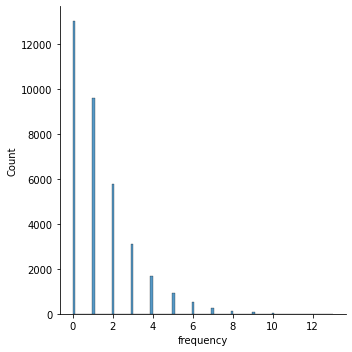

In [ ]:
sns.displot(df_train['frequency'])


# 순열 중요도

In [ ]:
!pip install eli5

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 28.3 MB/s 
     |████████████████████████████████| 133 kB 58.1 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=98aa40775262b1cfe180dce47c490e7f33e8c0135bdda6d0df251674c8d6c1e8
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
# permuter 정의
permuter = PermutationImportance(
    model, # model
    scoring='rmse', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.5 MB/s 
     |████████████████████████████████| 133 kB 31.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=0cc652d1751a50938d144f0ef4e7eabb2649a1524789d162bb708065b2fc91b1
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


KeyError: ignored

# Extra

In [ ]:
"""
Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['area'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('selectkbest',
                 SelectKBest(k=6,
                             score_func=<function f_regression at 0x7fd67be17050>)),
                ('xgbregressor',
                 XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=6,
                              min_child_weight=10, n_estimators=400,
                              objective='reg:squarederror'))])
"""

In [ ]:
"""   
## 원래 파라미터 튜닝

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

"""

In [ ]:
print('최적 하이퍼파라미터: ', search.best_params_)
print('CV MAE: ', -search.best_score_)
model = search.best_estimator_

In [ ]:
# 최상위 모델 사용
"""
XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.15, max_delta_step=None, max_depth=15,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=16, num_parallel_tree=None,
             random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             subsample=None, tree_method=None, validate_parameters=1,
             verbosity=None)

regressor = XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.15, max_delta_step=None, max_depth=15,
             min_child_weight=3, monotone_constraints=None,
             n_estimators=500, n_jobs=16, num_parallel_tree=None,
             random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             subsample=None, tree_method=None, validate_parameters=1,
             verbosity=None)
"""

regressor.fit(X_train,y_train["speed"])
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score:", r2_score(y_test["speed"],y_pred, multioutput='variance_weighted'))

R2 score: 0.14258774171629718


과적합 방지 - early stopping 도 있음
> XGBoost
- learning_rate (높을경우 과적합 위험이 있습니다)
- max_depth (낮은값에서 증가시키며 튜닝, 너무 깊어지면 과적합위험, -1 설정시 제한 없이 분기, 특성이 많을 수록 깊게 설정)
- n_estimators (너무 크게 주면 긴 학습시간, early_stopping_rounds와 같이 사용)
- scale_pos_weight (imbalanced 문제인 경우 적용시도)

In [ ]:
# 모델 빨리 만들어놓고 딥러닝도 바짝 하자 
# gradient boosting 학습
from category_encoders import OrdinalEncoder
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터

boosting = XGBRegressor(
    n_estimators=1000,
    objective='reg:squarederror', # default
    learning_rate=0.2,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

boosting.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          early_stopping_rounds=50
         )

In [ ]:
# R2 결정계수
y_pred = boosting.predict(X_val_encoded)
print('R^2', r2_score(y_val, y_pred))

In [ ]:
# gradient boosting 결과 해석
# PDP 특성 1개 사용, 2개 사용 각각

In [ ]:
# RMSE 기록
# 기본 모델 RMSE:  1.05253193618103
